# Test Data  Generation for given MetaData

# Objective :
                    To Create Sample/Dummy Data with given metadata information.
                    
                    

# Prerequisite:
                        Metadata information in below format :
        MetaData = [['Column_Name,'Dtype','Length','Null-Y/N',PK - Y/N,Partitions - Unique_Values]]
        
        Primary Key will get priority, PK column can not be Null/Duplicate.
        
        column_Name - Can be Any.
        DataType - varchar/Date/Number/Double
        PK - Y | N
        Nulls - Y | N
        Partition - How many Unique Values ?          # 0 if no partitions
        
        Num_of_Rows / Start_Date / End_Date / MaxNull Percentage --> Parameterized.
        These values can be updated as per user requirements.
        

In [149]:
#Import Libraries
import string
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
#MetaData Information
 Metadata = [['ID','varchar',10,'N','Y',0],['City','varchar',10,'Y','N',5],\
            ['Age','number',2,'N','N',0],['Date','Date',0,'Y','N',10],['Price','Double',5.4,'N','N',0]]

In [151]:
#User Defined Variables - How many Rows of Data | Start_Date, End_Date | Max Null Percentage Needed
NumofRows=100
Year_Startdate = '01011991'
Year_Enddate = '31122018'
maxnullpercent = 5

In [152]:
#Function to create random value for DataType - VarChar
def VarcharGen(size=6,uniquevaluelist=[], chars=string.ascii_uppercase + string.digits):
    if not uniquevaluelist:
        return ''.join(random.choices(chars, k=size))
    else:
        return random.choices(uniquevaluelist)[0]

In [153]:
#Function to Create a Random Number 
def NumberGen(size=5,uniquevaluelist=[]):
    if not uniquevaluelist:
        range_start = 10 ** (size - 1)
        range_end = (10 ** size) - 1
        return random.randint(range_start, range_end)
    else:
        return random.choices(uniquevaluelist)[0]

In [154]:
#Function to Create a Random Date
def DateGen(uniquevaluelist=[],start=datetime.datetime.strptime(Year_Startdate, '%d%m%Y').date(),end=datetime.datetime.strptime(Year_Enddate, '%d%m%Y').date()):
    if not uniquevaluelist:
        random_date = start + (end - start) * random.random()
        return random_date
    else:
        return random.choices(uniquevaluelist)[0]

In [155]:
#Function to Create a Double 
def DoubleGen(precision=3,scale=2,uniquevaluelist=[]):
    if not uniquevaluelist:
        range_start = 10 ** (precision - 1)
        range_end = (10 ** precision) - 1
        return round(random.uniform(range_start, range_end), scale)
    else:
        return random.choices(uniquevaluelist)[0]


In [156]:
#Function to call Data Generation Functions based on DataType
def Datatypefunc(datatypevalue,size=0,uniquevaluelist=[]):
    if datatypevalue.upper() == 'DATE':
        return DateGen(uniquevaluelist)
    elif datatypevalue.upper() =='VARCHAR':
        return VarcharGen(size,uniquevaluelist)
    elif datatypevalue.upper() == 'NUMBER':
        return NumberGen(size,uniquevaluelist)
    else:
        return DoubleGen(int(size),round((size-int(size))*10**(len(str((size)))-len(str(int(size)))-1)),uniquevaluelist)


In [157]:
#Empty data list to capture final data
data = []

In [158]:
# Use Cases/ Rules -- Main Function
def main():
    
    for i in range(len(Metadata)):
        data.append([Metadata[i][0]])
        coldata = []
        if Metadata[i][3] == 'Y':
            NumofNullRows = int(random.randint(1,maxnullpercent)*(NumofRows/100))
            NumofDataRows = NumofRows - NumofNullRows
        else:
            NumofDataRows = NumofRows

        if Metadata[i][5] != 0:
            uniquevaluelist = []
            for k in range(Metadata[i][5]):
                uniquevaluelist.append(Datatypefunc(Metadata[i][1], Metadata[i][2]))

            templist = list(set(uniquevaluelist))
            trycount = 0
            while len(uniquevaluelist) != len(templist):
                trycount += 1
                # print('Unique DataSet TryCount - ' + str(trycount))
                newvalue = Datatypefunc(Metadata[i][1], Metadata[i][2])
                if newvalue not in templist:
                    templist.append(newvalue)
            uniquevaluelist = templist

            for j in range(NumofDataRows):
                coldata.append(Datatypefunc(Metadata[i][1],Metadata[i][2],uniquevaluelist))

        else:
            for j in range(NumofDataRows):
                coldata.append(Datatypefunc(Metadata[i][1],Metadata[i][2]))

        if Metadata[i][3] == 'Y':
            for j in range(NumofNullRows):
                coldata.insert(random.randint(1,NumofDataRows),None)

        if Metadata[i][4] == 'Y':
            uniquecoldata = list(set(coldata))
            trycount=0
            while len(coldata) != len(uniquecoldata):
                trycount +=1
                # print('Unique DataSet TryCount - '+ str(trycount))
                newvalue = Datatypefunc(Metadata[i][1],Metadata[i][2])
                if newvalue not in uniquecoldata:
                    uniquecoldata.append(newvalue)
            coldata = uniquecoldata



        data[i].append(coldata)

#print(data)

In [159]:
#Main Programme Execution
if __name__ == '__main__':
    main()

In [160]:
#Converting Data to DataFrames 
Dict = dict(data)

DF = pd.DataFrame(Dict)

In [161]:
#Sample DataFrame Data
DF.head(5)

,ID,City,Age,Date,Price
0,77Z48DAT0F,A9XTPF317M,92,1999-01-09,80679.9871
1,EF5AN0PYHP,6UAAHYDAO3,35,2016-02-29,92274.1353
2,NTZ3NWIQ1N,6UAAHYDAO3,65,2004-06-18,46179.4977
3,AGNFG7QQ2J,U3WZ99SBGU,26,2005-08-19,42090.8498
4,AS0LWFF4IR,U3WZ99SBGU,17,None,90978.0519


Text(0.5, 1.0, 'Cities vs Count')

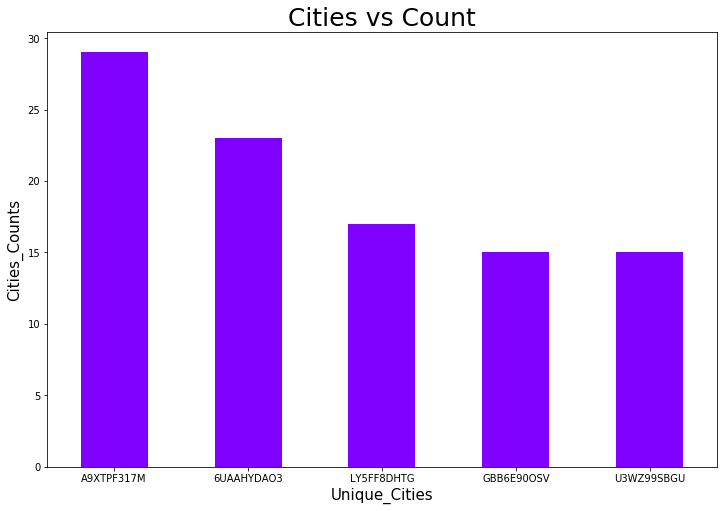

In [163]:
#Partition Check - Different Value Counts
DF.City.value_counts().plot(kind = 'bar',cmap = 'rainbow',figsize = [12,8], rot = 0)

plt.xlabel('Unique_Cities',fontsize = 15)
plt.ylabel('Cities_Counts', fontsize = 15)
plt.title('Cities vs Count',fontsize = 25)

In [164]:
#Null Values added as per metadata in City and Date
DF.isnull().sum() 

ID       0
City     1
Age      0
Date     4
Price    0
dtype: int64

In [165]:
DF.to_csv('Test_Generation.csv',header=True,index=False)

In [167]:
#List Files/Directories
!ls

Azure_Replica.ipynb
Final_Test_Data_Generation.ipynb
Loan_Test.csv
Loan_Train.csv
Test_Generation.csv
Untitled.ipynb


In [91]:
#Sample Data from .csv file
!head -5 Test_Generation.csv

ID,City,Age,Date,Price
VA3MRZ6GIK,8CW51AOX85,72,2018-03-29,18303.7798
99O7SFTAIY,2PWVTO5X9M,16,2018-03-29,87487.2486
XA8L770BDM,D8CQUBOM1P,71,2014-07-04,75745.1123
UZQR774FWA,D8CQUBOM1P,29,2018-03-29,55822.4498
